## 24. HuggingFace 커스텀 프로젝트 만들기

### STEP 1. NSMC 데이터 분석 및 Huggingface dataset 구성

In [3]:
# 데이터 불러오기
import datasets

# 데이터셋의 크기
num_train_set = 10000
num_val_set = 3000
num_test_set = 10000

hf_nsmc_train_data = datasets.load_dataset('e9t/nsmc', split=f"train[:{num_train_set}]")
hf_nsmc_val_data = datasets.load_dataset('e9t/nsmc', split=f"train[{num_train_set}:{num_train_set + num_val_set}]")
hf_nsmc_test_data = datasets.load_dataset('e9t/nsmc', split=f"test[:{num_test_set}]")

In [4]:
# 데이터셋 레이블 확인
print(hf_nsmc_train_data, hf_nsmc_val_data, hf_nsmc_test_data)

Dataset({
    features: ['id', 'document', 'label'],
    num_rows: 10000
}) Dataset({
    features: ['id', 'document', 'label'],
    num_rows: 3000
}) Dataset({
    features: ['id', 'document', 'label'],
    num_rows: 10000
})


In [7]:
# 데이터 확인 함수
def print_dataset(dataset):
    for i in range(3):
        for col in dataset.column_names:
            print (col, ": ", dataset[col][i])
        print()

In [8]:
# 데이터 확인
print_dataset(hf_nsmc_train_data)
print_dataset(hf_nsmc_val_data)
print_dataset(hf_nsmc_test_data)

id :  9976970
document :  아 더빙.. 진짜 짜증나네요 목소리
label :  0

id :  3819312
document :  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
label :  1

id :  10265843
document :  너무재밓었다그래서보는것을추천한다
label :  0

id :  9246662
document :  최고의 2d영화가 아닌가싶으다....!
label :  1

id :  3207978
document :  카리스마작렬~역대퍼니셔시리즈1.2.3中가장좋은액션수작!!
label :  1

id :  8117078
document :  음..별로다..정말로....
label :  0

id :  6270596
document :  굳 ㅋ
label :  1

id :  9274899
document :  GDNTOPCLASSINTHECLUB
label :  0

id :  8544678
document :  뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
label :  0



### STEP 2. klue/bert-base model 및 tokenizer 불러오기

In [9]:
# 사전 학습된 모델 및 토크나이저 불러오기
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")
#model = AutoModel.from_pretrained("klue/bert-base")
model = AutoModelForSequenceClassification.from_pretrained('klue/bert-base', num_labels=2)

tokenizer_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/425 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
# 토큰화 처리 함수
def transform(data):
    return tokenizer(data['document'], truncation=True, padding='max_length', return_token_type_ids=False)

In [11]:
# 토큰화
hf_nsmc_train_data = hf_nsmc_train_data.map(transform, batched=True)
hf_nsmc_val_data = hf_nsmc_val_data.map(transform, batched=True)
hf_nsmc_test_data = hf_nsmc_test_data.map(transform, batched=True)

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [12]:
# 데이터 확인
print_dataset(hf_nsmc_train_data)

id :  9976970
document :  아 더빙.. 진짜 짜증나네요 목소리
label :  0
input_ids :  [2, 1376, 831, 2604, 18, 18, 4229, 9801, 2075, 2203, 2182, 4243, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

## STEP 3. 위에서 불러온 tokenizer으로 데이터셋을 전처리하고, model 학습 진행해 보기

In [68]:
# 학습 파라미터 설정
from transformers import Trainer, TrainingArguments

output_dir = '.'

training_arguments = TrainingArguments(
    output_dir,
    eval_strategy="epoch",
    learning_rate = 1e-5,
    per_device_train_batch_size = 32,
    per_device_eval_batch_size = 32,
    num_train_epochs = 3,
    weight_decay = 0.02,
    lr_scheduler_type = "cosine",
    warmup_ratio = 0.25,
    group_by_length = True
)

#### 디버깅
- TrainingArguments에서 evaluation_strategy이 더 이상 사용되지 않는다는 경고 메시지 확인하여 eval_strategy로 수정
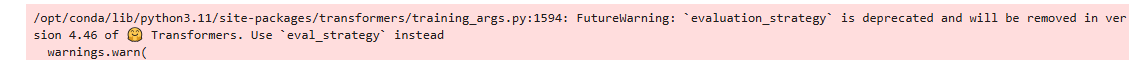

In [15]:
from datasets import load_metric

metric = load_metric('glue', 'mrpc')

def compute_metrics(eval_pred):    
    predictions,labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references = labels)

ImportError: cannot import name 'load_metric' from 'datasets' (/opt/conda/lib/python3.11/site-packages/datasets/__init__.py)

#### 디버깅
- load_metric을 import 할 수 없다는 에러 메시지 발생 ==> datasets 3.0 이후부터 load_metric 제거됨 ==>  **evaluate 모듈을 import 하고, load 함수 이용**
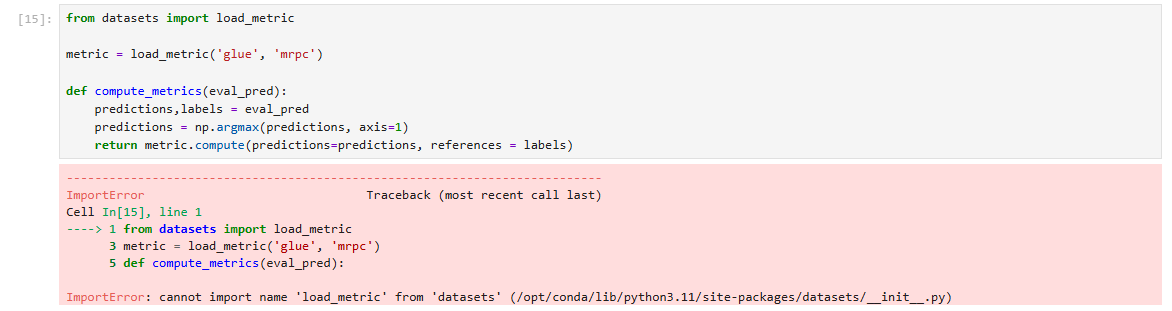

In [16]:
# 버전 확인
import datasets

print(datasets.__version__)

3.4.1


In [42]:
import numpy as np
import evaluate

#metric = evaluate.load('ingyu/klue_mrc')
#metric = evaluate.load('venkatasg/gleu')
metric = evaluate.load('accuracy')

def compute_metrics(eval_pred):    
    predictions,labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels)

#### 디버깅
- 메트릭으로 ingyu/klue_mrc 사용시 -> 실행 불가 -> datasets에서 지원하지 않는 속성있다고 나옴 
- 메트릭으로 venkatasg/gleu 사용시 -> 실행 가능 -> 학습 후 메트릭 계산 단계에서 평가를 위해 기대하는 형식과 입력 형식이 다르다고 나옴
- 최종적으로 accuracy로 변경

In [69]:
# 학습
trainer = Trainer(model=model, args=training_arguments, train_dataset=hf_nsmc_train_data, eval_dataset=hf_nsmc_val_data, compute_metrics=compute_metrics)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.730832,0.869667
2,0.027000,0.777732,0.868667
3,0.027000,0.780758,0.868667


Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.


TrainOutput(global_step=939, training_loss=0.021559933630930096, metrics={'train_runtime': 1124.0487, 'train_samples_per_second': 26.689, 'train_steps_per_second': 0.835, 'total_flos': 7893331660800000.0, 'train_loss': 0.021559933630930096, 'epoch': 3.0})

#### 디버깅
- **Case 1**: VRAM 4378/16380 MiB, TrainingArguments(learning_rate=2e-5, per_device_train_batch_size=**8**, per_device_eval_batch_size=8, num_train_epochs=3, weight_decay=0.01), TrainOutput(global_step=3750, training_loss=0.08773090896606445, metrics={'train_runtime': **1280.1168**, 'train_samples_per_second': 23.435, 'train_steps_per_second': 2.929, 'total_flos': 7893331660800000.0, 'train_loss': 0.08773090896606445, 'epoch': 3.0})
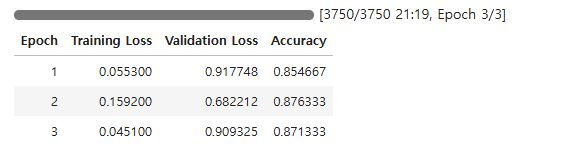
- **Case 2**: VRAM 11562/16380 MiB, TrainingArguments(learning_rate=2e-5, per_device_train_batch_size=**32**, per_device_eval_batch_size=8, num_train_epochs=3, weight_decay=0.01), TrainOutput(global_step=939, training_loss=0.03299296219635822, metrics={'train_runtime': **1125.6024**, 'train_samples_per_second': 26.652, 'train_steps_per_second': 0.834, 'total_flos': 7893331660800000.0, 'train_loss': 0.03299296219635822, 'epoch': 3.0})
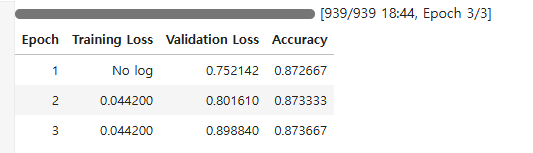
- Batch 사이즈를 늘려도(8->32) 학습 시간이 크게 줄지 않으며, 성능도 거의 변화 없음

In [67]:
# 테스트
trainer.evaluate(hf_nsmc_test_data)

{'eval_loss': 0.6458064913749695,
 'eval_accuracy': 0.8588,
 'eval_runtime': 107.611,
 'eval_samples_per_second': 92.927,
 'eval_steps_per_second': 2.909,
 'epoch': 3.0}

### STEP 4. Fine-tuning을 통하여 모델 성능(accuarcy) 향상시키기

#### 다양한 테스트 케이스에 대해 성능 분석
- **Case 1 (베이스 모델)**: TrainingArguments(learning_rate=2e-5, per_device_train_batch_size=32, per_device_eval_batch_size=8, num_train_epochs=3, weight_decay=0.01), TrainOutput(global_step=939, training_loss=0.03299296219635822, metrics={'train_runtime': 1125.6024, 'train_samples_per_second': 26.652, 'train_steps_per_second': 0.834, 'total_flos': 7893331660800000.0, 'train_loss': 0.03299296219635822, 'epoch': 3.0}), {'eval_loss': 0.887900710105896, 'eval_accuracy': **0.8702**, 'eval_runtime': 110.2951, 'eval_samples_per_second': 90.666, 'eval_steps_per_second': 11.333, 'epoch': 3.0}
- **Case 2 (weight_decay(L2-Norm) 변경)**: TrainingArguments(learning_rate=2e-5, per_device_train_batch_size=32, per_device_eval_batch_size=8, num_train_epochs=3, weight_decay=**0.05**), TrainOutput(global_step=939, training_loss=0.014739809960475999, metrics={'train_runtime': 1124.9651, 'train_samples_per_second': 26.667, 'train_steps_per_second': 0.835, 'total_flos': 7893331660800000.0, 'train_loss': 0.014739809960475999, 'epoch': 3.0}), {'eval_loss': 1.063702940940857, 'eval_accuracy': **0.8674**, 'eval_runtime': 111.038, 'eval_samples_per_second': 90.059, 'eval_steps_per_second': 11.257, 'epoch': 3.0}
- **Case 3 (Learing Rate 변경)**: TrainingArguments(learning_rate=**2e-4**, per_device_train_batch_size=32, per_device_eval_batch_size=8, num_train_epochs=3, weight_decay=0.01), TrainOutput(global_step=939, training_loss=0.2091821339437629, metrics={'train_runtime': 1125.6439, 'train_samples_per_second': 26.651, 'train_steps_per_second': 0.834, 'total_flos': 7893331660800000.0, 'train_loss': 0.2091821339437629, 'epoch': 3.0}), {'eval_loss': 0.5137311220169067, 'eval_accuracy': **0.853**, 'eval_runtime': 110.928, 'eval_samples_per_second': 90.149, 'eval_steps_per_second': 11.269, 'epoch': 3.0}
- **Case 4 (Epoch 변경)**: TrainingArguments(learning_rate=2e-5, per_device_train_batch_size=32, per_device_eval_batch_size=8, num_train_epochs=**2**, weight_decay=0.01), TrainOutput(global_step=626, training_loss=0.05984602035424961, metrics={'train_runtime': 751.024, 'train_samples_per_second': 26.63, 'train_steps_per_second': 0.834, 'total_flos': 5262221107200000.0, 'train_loss': 0.05984602035424961, 'epoch': 2.0}), {'eval_loss': 0.601671576499939, 'eval_accuracy': **0.8564**, 'eval_runtime': 111.4543, 'eval_samples_per_second': 89.723, 'eval_steps_per_second': 11.215, 'epoch': 2.0}
- **Case 5 (Learning Rate Scheduler 변경)**: TrainingArguments(learning_rate=**1e-5**, per_device_train_batch_size=32, per_device_eval_batch_size=32, num_train_epochs=3, weight_decay=0.02, lr_scheduler_type="**cosine**", warmup_ratio=0.25), TrainOutput(global_step=939, training_loss=0.03315923363763811, metrics={'train_runtime': 1122.2964, 'train_samples_per_second': 26.731, 'train_steps_per_second': 0.837, 'total_flos': 7893331660800000.0, 'train_loss': 0.03315923363763811, 'epoch': 3.0}), {'eval_loss': 0.6458064913749695, 'eval_accuracy': **0.8588**, 'eval_runtime': 107.611, 'eval_samples_per_second': 92.927, 'eval_steps_per_second': 2.909, 'epoch': 3.0}

#### 성능 비교
| 케이스 | Accuracy (Test Set) |
|---|---|
|Case 1 (베이스 모델)| 0.8702  |
|Case 2 (weight_decay(L2-Norm) 변경)| 0.8674  |
|Case 3 (Learing Rate 변경)| 0.853  |
|Case 4 (Epoch 변경)| 0.8564  |
|Case 5 (Learning Rate Scheduler 변경)| 0.8588  |

#### 분석
- 파라미터를 다양하게 변경하면서 학습을 진행시켜봤으나, 유의미한 성능 향상을 확인하지는 못함
- 다른 팀원과의 결과 비교를 통해, 데이터 사이즈가 상대적으로 작아서 낮은 성능을 보이는 것을 생각됨

## STEP 5. Bucketing을 적용하여 학습시키고, STEP 4의 결과와의 비교

In [70]:
# 데이터 사이즈 크게
num_train_set = 100000
num_val_set = 30000
num_test_set = 50000

hf_nsmc_train_data_large = datasets.load_dataset('e9t/nsmc', split=f"train[:{num_train_set}]")
hf_nsmc_val_data_large = datasets.load_dataset('e9t/nsmc', split=f"train[{num_train_set}:{num_train_set + num_val_set}]")
hf_nsmc_test_data_large = datasets.load_dataset('e9t/nsmc', split=f"test[:{num_test_set}]")

In [71]:
# 데이터셋 레이블 확인
print(hf_nsmc_train_data_large, hf_nsmc_val_data_large, hf_nsmc_test_data_large)

Dataset({
    features: ['id', 'document', 'label'],
    num_rows: 100000
}) Dataset({
    features: ['id', 'document', 'label'],
    num_rows: 30000
}) Dataset({
    features: ['id', 'document', 'label'],
    num_rows: 50000
})


In [114]:
# 토큰화 처리 함수 - Dynamic padding 적용
def transform_with_dynamic_padding(data):
    return tokenizer(data['document'], truncation=True, padding=False, return_token_type_ids=False)

In [115]:
# 토큰화
hf_nsmc_train_data_large = hf_nsmc_train_data_large.map(transform_with_dynamic_padding, batched=True, batch_size=32)
hf_nsmc_val_data_large = hf_nsmc_val_data_large.map(transform_with_dynamic_padding, batched=True, batch_size=32)
hf_nsmc_test_data_large = hf_nsmc_test_data_large.map(transform_with_dynamic_padding, batched=True, batch_size=32)

Map:   0%|          | 0/100000 [00:00<?, ? examples/s]

Map:   0%|          | 0/30000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [108]:
# Dynamic Padding이 적용된 데이터를 위한 Collector
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [116]:
# 학습 파라미터
training_arguments = TrainingArguments(
    output_dir,
    eval_strategy="epoch",
    learning_rate = 2e-5,
    lr_scheduler_type = "cosine",
    warmup_ratio = 0.25,
    per_device_train_batch_size = 32,
    per_device_eval_batch_size = 32,
    num_train_epochs = 3,
    weight_decay = 0.01,
    group_by_length = True
)

In [117]:
# 학습
model = AutoModelForSequenceClassification.from_pretrained('klue/bert-base', num_labels=2)

trainer = Trainer(model=model, args=training_arguments, train_dataset=hf_nsmc_train_data_large, eval_dataset=hf_nsmc_val_data_large, data_collator=data_collator, compute_metrics=compute_metrics)

trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.282900,0.254248,0.894567
2,0.208500,0.240679,0.904933
3,0.125200,0.294848,0.904867


Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.


TrainOutput(global_step=9375, training_loss=0.22549474568684896, metrics={'train_runtime': 11265.1545, 'train_samples_per_second': 26.631, 'train_steps_per_second': 0.832, 'total_flos': 7.8933316608e+16, 'train_loss': 0.22549474568684896, 'epoch': 3.0})

In [118]:
# 테스트
trainer.evaluate(hf_nsmc_test_data_large)

Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.


{'eval_loss': 0.2999756932258606,
 'eval_accuracy': 0.90318,
 'eval_runtime': 542.5645,
 'eval_samples_per_second': 92.155,
 'eval_steps_per_second': 2.881,
 'epoch': 3.0}

#### 분석
- **Dynamic Padding 적용**: TrainingArguments(learning_rate=2e-5, lr_scheduler_type="cosine", warmup_ratio=0.25, per_device_train_batch_size=32, per_device_eval_batch_size=32, num_train_epochs=3, weight_decay=0.01, group_by_length=True), TrainOutput(global_step=9375, training_loss=0.22688954630533853, metrics={'train_runtime': **896.2198**, 'train_samples_per_second': 334.739, 'train_steps_per_second': 10.461, 'total_flos': 3622776121251840.0, 'train_loss': 0.22688954630533853, 'epoch': 3.0}), {'eval_loss': 0.3044652044773102, 'eval_accuracy': **0.90216**, 'eval_runtime': 25.1261, 'eval_samples_per_second': 1989.966, 'eval_steps_per_second': 62.206, 'epoch': 3.0}

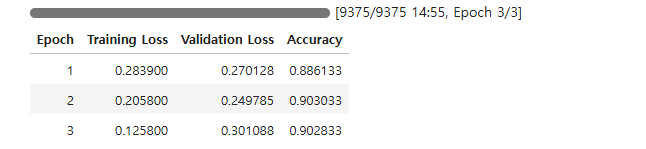
- **Dynamic Padding 미적용**: TrainingArguments(learning_rate=2e-5, lr_scheduler_type="cosine", warmup_ratio=0.25, per_device_train_batch_size=32, per_device_eval_batch_size=32, num_train_epochs=3, weight_decay=0.01, group_by_length=True), TrainOutput(global_step=9375, training_loss=0.22549474568684896, metrics={'train_runtime': **11265.1545**, 'train_samples_per_second': 26.631, 'train_steps_per_second': 0.832, 'total_flos': 7.8933316608e+16, 'train_loss': 0.22549474568684896, 'epoch': 3.0}), {'eval_loss': 0.2999756932258606, 'eval_accuracy': **0.90318**, 'eval_runtime': 542.5645, 'eval_samples_per_second': 92.155, 'eval_steps_per_second': 2.881, 'epoch': 3.0}

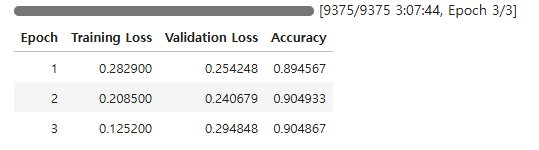

#### 성능 비교
|Dynamic Padding | 미적용 | 적용  | 차이 | 비율  |
|---|---|---|---|---|
|Train Time   | 11265.1545[s] (3:07:44)  | 896.2198[s] (14:55)  | 10368.9365[s] | 0.0795 |
|Accuracy (Test Set)   | 0.90318  | 0.90216  | 0.00102 | 0.9989  |

#### 분석
- Dynamic Padding 적용시 성능의 변화는 거의 없으면서, 매우 빠른 학습 속도(대략 12배)를 보임

## 회고
- 미리 학습된 대형 모델에서 fine-tuning 과정을 통해 문제에 적합한 모델을 만드는 법을 배울 수 있었음
- 허깅페이스에서 제공되는 모델이 기본적으로 PyTorch를 기반으로 하고 있어서, 백엔드가 TensorFlow인 경우 안되는 것이 있음을 확인 (PyTorch 공부의 필요성)
- 대규모 데이터를 이용해서 학습을 진행하는 경우, 상당한 메모리와 많은 연산 시간을 필요로 함 (15만개 데이터 기준 LMS에서 Epoch당 3시간)
- Dynamic Padding을 통해 연산 시간을 크게 줄일 수 있음을 확인
- Dynamic Padding을 적용하는 과정에서 많은 시행착오가 있었는데, 인터넷 검색을 통해 해결 방법을 찾는데 많은 시간이 들었음
- Transformer 모듈에 대한 문서화가 다른 라이브러리에 비해 잘되어 있는 편이었음에도 설명이 부족한 부분이 많음.